In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium
import xgboost
import sklearn
from pylab import rcParams
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
import bokeh as bh

df = pd.read_csv('C:/Users/Bilal Aktas/Desktop/Git Lab/Fontys/Fontys Subjects/Semester 4/Applied Data Science A/Project/Dataset/ds2020.csv', header=None)


## Data Preparation

In [105]:
df.columns = ['Delivery date', 'Delivery time', 'Pharmacy number', 'Pharmacy Postcode (2)', 'Year of birth', 
              'Gender', 'CNK', 'Product name', 'ATC code', 'Units', 'Price', 'Contribution']

In [106]:
df.head()

,Delivery date,Delivery time,Pharmacy number,Pharmacy Postcode (2),Year of birth,Gender,CNK,Product name,ATC code,Units,Price,Contribution
0,01/01/2020,00:00,9105972,10,1925,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00
1,01/01/2020,00:00,9105972,10,1923,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00
2,01/01/2020,00:00,9105972,10,1924,2,736165,BURINEX COMP 1 X 5 MG,C03CA02,0,0.38,0.08
3,01/01/2020,00:00,9105972,10,1921,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10
4,01/01/2020,00:00,9105972,10,1924,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10


In [107]:
TimeNull = df['Delivery time']
TimeNull.fillna('00:00',inplace=True)

In [108]:
df = df[df['Gender'] != 0]
df = df[df['Gender'] != 3]

In [109]:
df["Gender"].value_counts(sort=True)

2    2856183
1    2203711
Name: Gender, dtype: int64

In [110]:
df['Delivery date'] = pd.to_datetime(df['Delivery date'], infer_datetime_format=True)

In [111]:
df.isnull().any()

Delivery date            False
Delivery time            False
Pharmacy number          False
Pharmacy Postcode (2)    False
Year of birth            False
Gender                   False
CNK                      False
Product name             False
ATC code                 False
Units                    False
Price                    False
Contribution             False
dtype: bool

In [112]:
df['ATCShort'] = df['ATC code'].str[:3]
df.head(50)

,Delivery date,Delivery time,Pharmacy number,Pharmacy Postcode (2),Year of birth,Gender,CNK,Product name,ATC code,Units,Price,Contribution,ATCShort
0,2020-01-01,00:00,9105972,10,1925,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00,
1,2020-01-01,00:00,9105972,10,1923,2,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,0,3.20,0.00,
2,2020-01-01,00:00,9105972,10,1924,2,736165,BURINEX COMP 1 X 5 MG,C03CA02,0,0.38,0.08,C03
3,2020-01-01,00:00,9105972,10,1921,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10,B01
4,2020-01-01,00:00,9105972,10,1924,2,750695,XARELTO COMP 1 X 15 MG,B01AF01,0,2.38,0.10,B01
5,2020-01-01,00:00,9105972,10,1921,2,7706310,ESCITALOPRAM TEVA COMP 1 X 10 MG,N06AB10,0,0.17,0.04,N06
6,2020-01-01,00:00,9105972,10,1921,2,7706310,ESCITALOPRAM TEVA COMP 1 X 10 MG,N06AB10,0,0.17,0.04,N06
7,2020-01-01,00:00,9105972,10,1924,2,743732,L THYROXINE CHRISTIAENS COMP 1 X 50 MCG,H03AA01,0,0.02,0.01,H03
8,2020-01-01,00:00,9105972,10,1923,2,743732,L THYROXINE CHRISTIAENS COMP 1 X 50 MCG,H03AA01,0,0.02,0.01,H03
9,2020-01-01,00:00,9105972,10,1923,2,789537,ASAFLOW COMP 1 X 80 MG,B01AC06,0,0.03,0.01,B01


In [113]:
df['Delivery date'].min()

Timestamp('2020-01-01 00:00:00')

In [114]:
df['Delivery date'].max()

Timestamp('2020-12-06 00:00:00')

# Sales in 2020

In [57]:
df = df.sort_values('Delivery date')

In [58]:
df = df.groupby('Delivery date')['Price'].sum().reset_index()

In [59]:
df

,Delivery date,Price
0,2020-01-01,9940.83
1,2020-01-02,552784.38
2,2020-01-03,608643.46
3,2020-01-04,304993.12
4,2020-01-05,14375.33
...,...,...
237,2020-11-07,475.05
238,2020-12-02,3504.75
239,2020-12-03,3081.04
240,2020-12-05,4787.53


In [60]:
df['month'] = df['Delivery date'].dt.month

In [61]:
df['month']

0       1
1       1
2       1
3       1
4       1
       ..
237    11
238    12
239    12
240    12
241    12
Name: month, Length: 242, dtype: int64

In [62]:
import calendar
df['monthName'] = df['month'].apply(lambda x: calendar.month_name[x])

In [63]:
df['monthName']

0       January
1       January
2       January
3       January
4       January
         ...   
237    November
238    December
239    December
240    December
241    December
Name: monthName, Length: 242, dtype: object

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['monthName'].apply(lambda x:ordered_months.index(x))

In [64]:
df

,Delivery date,Price,month,monthName
0,2020-01-01,9940.83,1,January
1,2020-01-02,552784.38,1,January
2,2020-01-03,608643.46,1,January
3,2020-01-04,304993.12,1,January
4,2020-01-05,14375.33,1,January
...,...,...,...,...
237,2020-11-07,475.05,11,November
238,2020-12-02,3504.75,12,December
239,2020-12-03,3081.04,12,December
240,2020-12-05,4787.53,12,December


In [65]:
import plotly.express as px
fig = px.line(df, x="monthName" , y="Price",title="Sales in 2020")
fig.show()

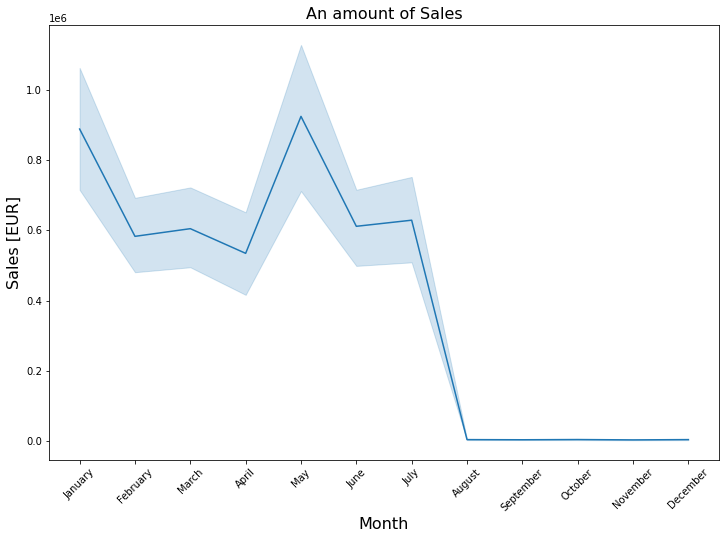

In [67]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,y="Price",x="monthName",markers=True,dashes=False)
plt.title("An amount of Sales", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Sales [EUR]", fontsize=16)
plt.show()


In [76]:
fig = px.bar(df, x="monthName" , y="Price",
            title="Sales in 2020",labels={
                     "monthName": "Month",
                     "Price": "Sales[EUR]"})
fig.show()

# Number of Deliveries in 2020

In [88]:
df = df.sort_values('Delivery date')

In [89]:
df = df.groupby('Delivery date')['ATC code'].count().reset_index()

In [90]:
df['month'] = df['Delivery date'].dt.month

In [91]:
import calendar
df['monthName'] = df['month'].apply(lambda x: calendar.month_name[x])

In [92]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['monthName'].apply(lambda x:ordered_months.index(x))

0       0
1       0
2       0
3       0
4       0
       ..
237    10
238    11
239    11
240    11
241    11
Name: monthName, Length: 242, dtype: int64

In [93]:
df

,Delivery date,ATC code,month,monthName
0,2020-01-01,788,1,January
1,2020-01-02,19607,1,January
2,2020-01-03,24267,1,January
3,2020-01-04,9404,1,January
4,2020-01-05,901,1,January
...,...,...,...,...
237,2020-11-07,13,11,November
238,2020-12-02,137,12,December
239,2020-12-03,98,12,December
240,2020-12-05,125,12,December


In [94]:
fig = px.line(df, x="monthName" , y="ATC code",title="Number of deliveries in 2020")
fig.show()

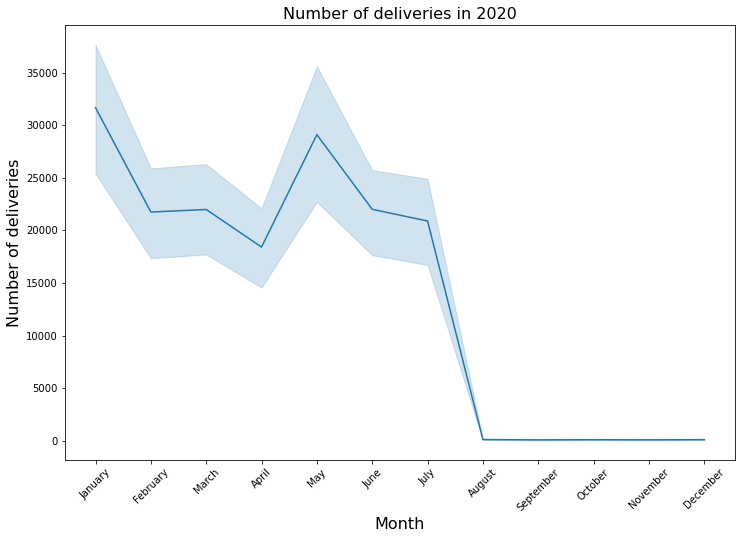

In [95]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,y="ATC code",x="monthName",markers=True,dashes=False)
plt.title("Number of deliveries in 2020", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of deliveries", fontsize=16)
plt.show()

### Democrapahic Analysis 

In [115]:
df =df.loc[(df["Pharmacy Postcode (2)"] >=10) & (df["Pharmacy Postcode (2)"] <=12)]

In [116]:
df = df.groupby('Delivery date')['Price'].sum().reset_index()

In [117]:
df['month'] = df['Delivery date'].dt.month

In [118]:
import calendar
df['monthName'] = df['month'].apply(lambda x: calendar.month_name[x])

In [119]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['monthName'].apply(lambda x:ordered_months.index(x))

0      0
1      0
2      0
3      0
4      0
      ..
207    6
208    6
209    6
210    6
211    6
Name: monthName, Length: 212, dtype: int64

In [121]:
df

,Delivery date,Price,month,monthName
0,2020-01-01,4081.20,1,January
1,2020-01-02,84679.29,1,January
2,2020-01-03,90702.28,1,January
3,2020-01-04,50292.72,1,January
4,2020-01-05,922.82,1,January
...,...,...,...,...
207,2020-07-27,136173.50,7,July
208,2020-07-28,125721.30,7,July
209,2020-07-29,107054.98,7,July
210,2020-07-30,92367.21,7,July


In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,y="ATC code",x="monthName",markers=True,dashes=False)
plt.title("Number of deliveries in 2020", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of deliveries", fontsize=16)
plt.show()

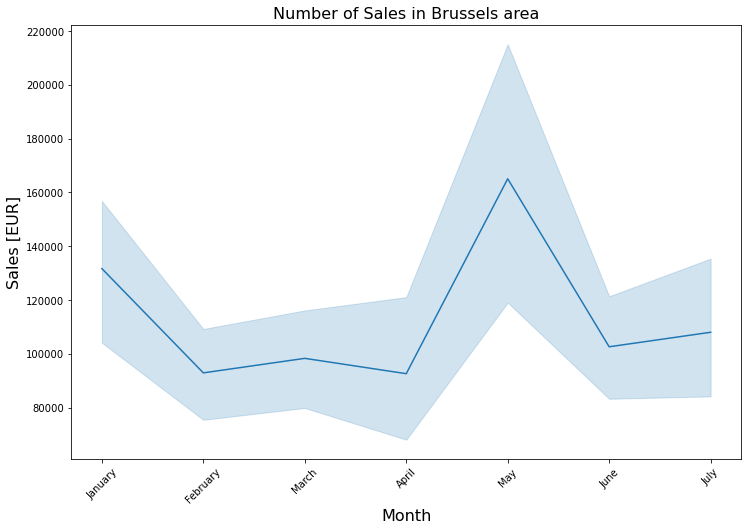

In [120]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df,y="Price",x="monthName",markers=True,dashes=False)
plt.title("Number of Sales in Brussels area", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Sales [EUR]", fontsize=16)
plt.show()